In [1]:
import pandas as pd 
import numpy as np

In [2]:
fraud_data=pd.read_csv(r"C:\Users\pc\Downloads\Fraud.csv")

In [3]:
fraud_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
fraud_data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
fraud_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
fraud_data.isna

<bound method DataFrame.isna of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1

In [7]:
fraud_data.replace("?",np.nan,inplace=True)

In [8]:
X_=fraud_data.drop(["nameOrig"],axis=1)
x=X_.drop(["nameDest"],axis=1)
X=x.drop(["isFraud"],axis=1)

In [10]:
y=fraud_data["isFraud"]

In [11]:
y.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder

In [21]:
ss=StandardScaler()
ode=OrdinalEncoder()
lb=LabelEncoder()

In [22]:
X["type"]=lb.fit_transform(X["type"].values.reshape(-1,1))

C:\Users\pc\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
sm=SMOTE()

In [23]:
X,y=sm.fit_resample(X,y)

In [25]:
y.value_counts()

0    6354407
1    6354407
Name: isFraud, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=21)

KeyboardInterrupt: 

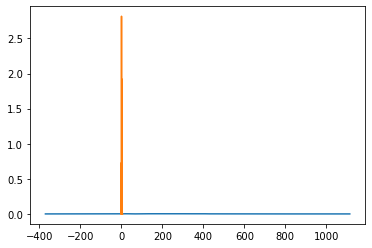

In [33]:
xtrain.plot.kde()

In [34]:
xtrn=ss.fit_transform(xtrain)

In [ ]:
pd.DataFrame(xtrn).plot.kde()

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr=LogisticRegression()

In [41]:
lr.fit(xtrn,ytrain)

LogisticRegression()

In [43]:
lr_score=lr.score(xtrn,ytrain)
print(lr_score)

0.9353438541916189


In [44]:
ypred=lr.predict(xtrn)

In [45]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [46]:
cm=confusion_matrix(ytrain,ypred)
print(cm)

[[4305197  142019]
 [ 433173 4015780]]


In [47]:
import matplotlib.pyplot as plt

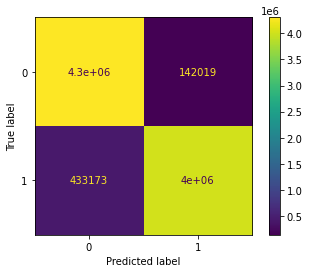

In [48]:
disp=ConfusionMatrixDisplay(cm,display_labels=lr.classes_)
disp.plot()
plt.show()

In [49]:
ytest_pred=lr.predict(xtest)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [50]:
lr.score(xtest,ytest)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.7948293114097955

In [51]:
cm1=confusion_matrix(ytest,ytest_pred)

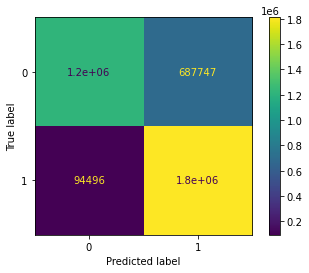

In [55]:
display=ConfusionMatrixDisplay(cm1,display_labels=lr.classes_)
display.plot()
